In [40]:
# import required packages
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
import matplotlib.pyplot as plt

In [41]:
# Initialize image data generator with rescaling
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [42]:
# Preprocess all test images
train_generator = train_data_gen.flow_from_directory(
        'data/train',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

# Preprocess all train images
validation_generator = validation_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


Found 33069 images belonging to 7 classes.
Found 8288 images belonging to 7 classes.


In [43]:
# create model structure
emotion_model = Sequential([
Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)),
Conv2D(64, kernel_size=(3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Conv2D(128, kernel_size=(3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Conv2D(128, kernel_size=(3, 3), activation='relu'),
MaxPooling2D(pool_size=(2, 2)),
Dropout(0.25),

Flatten(),
Dense(1024, activation='relu'),
Dense(512, activation='relu'),
Dropout(0.5),
Dense(7, activation='softmax')
])
cv2.ocl.setUseOpenCL(False)

In [44]:
#Early stopping
mc = callbacks.ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [45]:
emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001, decay=1e-6), metrics=['accuracy'])

# Train the neural network/model
emotion_model_info = emotion_model.fit_generator(
        train_generator,
        steps_per_epoch=33069 // 64,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=8288 // 64,
        callbacks=[mc]
        )

Epoch 1/50


C:\Users\jmspa\AppData\Local\Temp\ipykernel_8336\1962245180.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  emotion_model_info = emotion_model.fit_generator(


516/516 [==============================] - ETA: 0s - loss: 1.7606 - accuracy: 0.3023
Epoch 1: val_loss improved from inf to 1.53091, saving model to best_model.h5
516/516 [==============================] - 99s 190ms/step - loss: 1.7606 - accuracy: 0.3023 - val_loss: 1.5309 - val_accuracy: 0.4293
Epoch 2/50
516/516 [==============================] - ETA: 0s - loss: 1.4299 - accuracy: 0.4573
Epoch 2: val_loss improved from 1.53091 to 1.32618, saving model to best_model.h5
516/516 [==============================] - 109s 212ms/step - loss: 1.4299 - accuracy: 0.4573 - val_loss: 1.3262 - val_accuracy: 0.5006
Epoch 3/50
516/516 [==============================] - ETA: 0s - loss: 1.3301 - accuracy: 0.4960
Epoch 3: val_loss improved from 1.32618 to 1.26990, saving model to best_model.h5
516/516 [==============================] - 103s 200ms/step - loss: 1.3301 - accuracy: 0.4960 - val_loss: 1.2699 - val_accuracy: 0.5165
Epoch 4/50
516/516 [==============================] - ETA: 0s - loss: 1.2665 

In [46]:
# save model structure in jason file
model_json = emotion_model.to_json()
with open("emotion_model.json", "w") as json_file:
    json_file.write(model_json)

# save trained model weight in .h5 file
emotion_model.save_weights('emotion_model.h5')

[1.7605910301208496, 1.4299427270889282, 1.3301132917404175, 1.2664648294448853, 1.210268259048462, 1.164241909980774, 1.123976469039917, 1.0844310522079468, 1.0546663999557495, 1.0208613872528076, 0.9846370220184326, 0.9556674361228943, 0.926559567451477, 0.8958509564399719, 0.8640029430389404, 0.8289546966552734, 0.7988741993904114, 0.7569180727005005, 0.7283504009246826, 0.6901862621307373, 0.6542965173721313, 0.6138055324554443, 0.5725955367088318, 0.5398572683334351, 0.4963679313659668, 0.46326014399528503, 0.43104684352874756, 0.3991186022758484, 0.3700513243675232, 0.33987870812416077, 0.3135412335395813, 0.28983983397483826, 0.2654801309108734, 0.24964796006679535, 0.23223425447940826, 0.21538753807544708, 0.19607961177825928, 0.1869802623987198, 0.1717437356710434, 0.16750197112560272, 0.15568239986896515, 0.145392045378685, 0.1434730738401413, 0.13384473323822021, 0.1254008263349533, 0.12285693734884262, 0.10949548333883286, 0.11208035796880722, 0.10458659380674362, 0.1023468

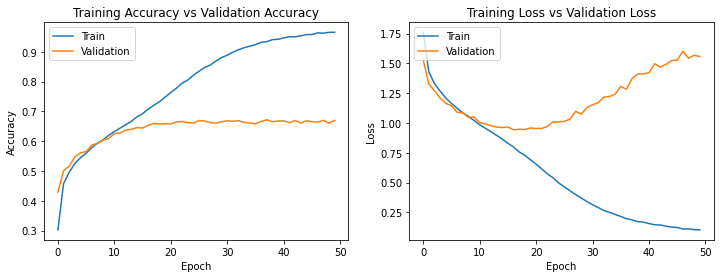

In [48]:

fig , ax = plt.subplots(1,2)
print(emotion_model_info.history['loss'])
train_acc = emotion_model_info.history['accuracy']
train_loss = emotion_model_info.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(emotion_model_info.history['accuracy'])
ax[0].plot(emotion_model_info.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(emotion_model_info.history['loss'])
ax[1].plot(emotion_model_info.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [51]:
print(emotion_model_info.history['val_loss'].index(min(emotion_model_info.history['val_loss'])))

16


In [55]:
print(emotion_model_info.history['accuracy'][16])
print(emotion_model_info.history['loss'][16])
print(emotion_model_info.history['val_accuracy'][16])
print(emotion_model_info.history['val_loss'][16])

0.7077715396881104
0.7988741993904114
0.6537063717842102
0.9417711496353149
